File used for testing outputs and methods

In [263]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import os

In [264]:
#Function to read a specified excel file and sheet number
def readInData (fileName,sheet):
    current_dir = os.getcwd()
    file_dir = current_dir+fileName
    data = pd.read_excel(file_dir,sheet) #Reads in the specified sheet index from the data file
    clean = data.iloc[18::15,[0,1,2,3,5,6,7,9,10,11]] #Takes only the totals from each location and only the male, female and total pass %s
    clean.columns = ['Location','Male Conducted','Male Passed','Male%','Female Conducted','Female Passed','Female%','Total Conducted','Total Passed','Total%']
    clean = clean.drop(clean[clean['Male%'] == '..'].index)
    clean = clean.drop(clean[clean['Female%'] == '..'].index)
    clean = clean.drop(clean[clean['Total%'] == '..'].index)
    clean = clean.astype({'Male Conducted':'float','Male Passed':'float','Male%':'float','Female Conducted':'float','Female Passed':'float','Female%':'float','Total Conducted':'float','Total Passed':'float','Total%':'float'})
    clean = clean[clean['Total Conducted'] > 4000]
    clean = clean.reset_index(drop=True) #Tidies up dataframe by correcting index values
    clean['Location'] = clean['Location'].str.replace('Total', '')
    return clean

In [265]:
#Function to print max and min values for each column for the months only as a dataframe
def maxMinValuesReturn (df):
    maxMale = df[df['Male%']==df['Male%'].max()]
    maxMale['Index'] = 'maxMale'
    minMale = df[df['Male%']==df['Male%'].min()]
    minMale['Index'] = 'minMale'
    maxFemale = df[df['Female%']==df['Female%'].max()]
    maxFemale['Index'] = 'maxFemale'
    minFemale = df[df['Female%']==df['Female%'].min()]
    minFemale['Index'] = 'minFemale'
    maxTotal = df[df['Total%']==df['Total%'].max()]
    maxTotal['Index'] = 'maxTotal'
    minTotal = df[df['Total%']==df['Total%'].min()]
    minTotal['Index'] = 'minTotal'
    rdf = pd.concat([maxMale,minMale,maxFemale,minFemale,maxTotal,minTotal],axis=0)
    rdf.set_index('Index', inplace = True)
    rdf = rdf.rename_axis(None)
    return rdf

In [266]:
fileName = '/testcenterdata.xlsx'
y24 = readInData(fileName,3).copy(deep=True)
y24

,Location,Male Conducted,Male Passed,Male%,Female Conducted,Female Passed,Female%,Total Conducted,Total Passed,Total%
0,Aberdeen,8302.0,3836.0,46.205734,6980.0,3532.0,50.601719,15282.0,7368.0,48.213585
1,Aldershot,9070.0,4010.0,44.211687,7409.0,3584.0,48.373600,16479.0,7594.0,46.082893
2,Andover,4095.0,1890.0,46.153846,3445.0,1733.0,50.304790,7540.0,3623.0,48.050398
3,Aylesbury,7320.0,3427.0,46.816940,5695.0,2830.0,49.692713,13015.0,6257.0,48.075298
4,Ayr,5099.0,2161.0,42.380859,4867.0,2252.0,46.270803,9966.0,4413.0,44.280554
...,...,...,...,...,...,...,...,...,...,...
113,Workington,2239.0,934.0,41.715051,1803.0,812.0,45.036051,4042.0,1746.0,43.196437
114,Worthing,4448.0,2001.0,44.986511,3548.0,1730.0,48.759865,7996.0,3731.0,46.660830
115,Wrexham,4426.0,1830.0,41.346588,3368.0,1614.0,47.921615,7794.0,3444.0,44.187837
116,Yeovil,3776.0,1624.0,43.008475,2973.0,1476.0,49.646821,6749.0,3100.0,45.932731


In [267]:
y24c = maxMinValuesReturn(y24)
y24c

,Location,Male Conducted,Male Passed,Male%,Female Conducted,Female Passed,Female%,Total Conducted,Total Passed,Total%
maxMale,Guildford,8285.0,4288.0,51.756186,7223.0,3953.0,54.727952,15508.0,8241.0,53.140315
minMale,Bradford,22035.0,8091.0,36.718856,16673.0,6464.0,38.769268,38708.0,14555.0,37.602046
maxFemale,Royal Tunbridge Wells,4969.0,2499.0,50.291809,4121.0,2342.0,56.830866,9090.0,4841.0,53.256326
minFemale,Bradford,22035.0,8091.0,36.718856,16673.0,6464.0,38.769268,38708.0,14555.0,37.602046
maxTotal,Cambridge,12490.0,6418.0,51.385108,9772.0,5536.0,56.651658,22262.0,11954.0,53.696883
minTotal,Bradford,22035.0,8091.0,36.718856,16673.0,6464.0,38.769268,38708.0,14555.0,37.602046


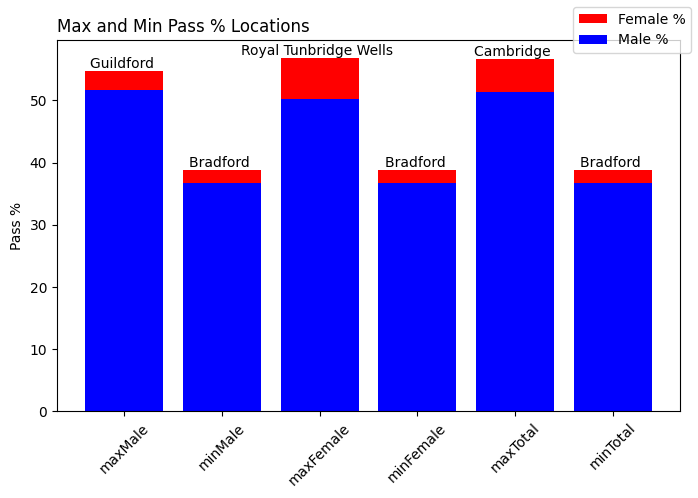

In [268]:
#Creating first figure
fig,ax = plt.subplots(figsize=(7,5))
plt.xticks(rotation=45)
index = np.arange(len(y24c['Total Conducted']))
a = ax.bar(x=y24c.index, height=y24c['Female%'], align = 'center', label='Female %', color='r')
ax.bar(x=index, height=y24c['Male%'], align = 'center', label='Male %',color='b')
ax.set_title('Max and Min Pass % Locations', loc = 'left')
ax.bar_label(container = a,labels = y24c['Location'])
ax.set_ylabel('Pass %')
fig.tight_layout()
fig.legend()

In [269]:
#Function to read Bradford in from excel file and sheet number
def readInDataBradford (fileName,sheet):
    current_dir = os.getcwd()
    file_dir = current_dir+fileName
    data = pd.read_excel(file_dir,sheet) #Reads in the specified sheet index from the data file
    clean = data.iloc[366:378,[0,1,2,3,5,6,7,9,10,11]] #Takes only the totals from each date and only the male, female and total pass %s
    clean.columns = ['Date','Male Conducted','Male Passed','Male%','Female Conducted','Female Passed','Female%','Total Conducted','Total Passed','Total%']
    clean = clean.astype({'Male Conducted':'float','Male Passed':'float','Male%':'float','Female Conducted':'float','Female Passed':'float','Female%':'float','Total Conducted':'float','Total Passed':'float','Total%':'float'})
    clean = clean.reset_index(drop=True) #Tidies up dataframe by correcting index values
    return clean
bradford = readInDataBradford(fileName,3)

In [274]:
def secondFig(bradford):
    fig,ax = plt.subplots(figsize=(7,7))
    plt.xticks(rotation=45)
    ax.plot(bradford['Male%'], label = 'Male % Pass', color='b')
    ax.plot(bradford['Female%'], label = 'Female % Pass', color='r')
    ax.set_ylabel('Pass %')
    ax.set_xticks(bradford['Date'])
    ax.set_title('Bradford 2023-2024')
    fig.tight_layout()
    fig.legend()
    return

ConversionError: Failed to convert value(s) to axis units: 0     Apr 2023
1     May 2023
2     Jun 2023
3     Jul 2023
4     Aug 2023
5     Sep 2023
6     Oct 2023
7     Nov 2023
8     Dec 2023
9     Jan 2024
10    Feb 2024
11    Mar 2024
Name: Date, dtype: object

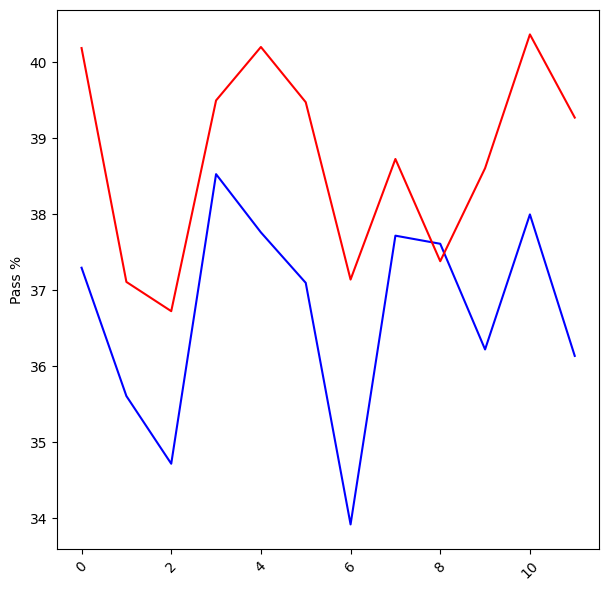

In [275]:
secondFig(bradford)